# Assignment 1

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a tumor. A tumor does not mean cancer - tumors can be benign (patient doesn't have breast cancer) or malignant (patient has breast cancer). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.


In this assignment, you will be analyzing ultrasound data of breast cancer tumors. Several characteristics of the tumor are given in the dataset, and you will create a model that will predict whether or not a patient has a positive breast cancer diagnosis based off of the tumor characteristics.

This data set contains the following features:

* id (patientid)
* name
* radius (the distance from the center to the circumference of the tumor)
* texture (standard deviation of gray-scale values)
* perimeter (circumference of the tumor, approx. 2*3.14 *radius)
* area
* smoothness (local variation in radius lengths)
* compactness
* concavity (severity of concave portions of the contour)
* symmetry
* fractal_dimension
* age
* diagnosis: 0 or 1 indicating whether patient has breast cancer or not




## Library and Data Import

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Libraries have been imported! :)')

Libraries have been imported! :)


In [2]:
train = pd.read_csv("breastcancer.csv")

In [3]:
print(f'Preview:\n\n{train.head()}')

Preview:

           id                     name  radius  texture  perimeter    area  \
0    ID842302           Glynnis Munson     NaN    10.38     122.80  1001.0   
1    ID842517              Lana Behrer   20.57    17.77     132.90  1326.0   
2  ID84300903  Devondra Vanvalkenburgh   19.69    21.25     130.00  1203.0   
3  ID84348301          Glory Maravalle     NaN    20.38      77.58   386.1   
4  ID84358402           Mellie Mccurdy   20.29    14.34     135.10  1297.0   

   smoothness  compactness  concavity  symmetry  fractal_dimension  age  \
0     0.11840      0.27760     0.3001    0.2419            0.07871   35   
1     0.08474      0.07864     0.0869    0.1812            0.05667   27   
2     0.10960      0.15990     0.1974    0.2069            0.05999   31   
3     0.14250      0.28390     0.2414    0.2597            0.09744   49   
4     0.10030      0.13280     0.1980    0.1809            0.05883   20   

   diagnosis  
0          1  
1          1  
2          1  
3         

## Exploratory Data Analysis through Visualizations

### Visualization #1: Heat Map

>*seaborn.heatmap* documentation:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

**Parameters Explained**
 - data
     - 2D dataset that can be coerced into an ndarray
     - if it's a pd.dataframe -> index/col information will be used to label the columns and rows
 - cmap
     - mapping from data values to color space
     - if not provided -> default will depend on whether or not *center* is set
 - center
     - value at which to center the colormap when plotting divergent data
     - using this parameter will change the default *cmap* if none is specified
 - yticklabels
     - True -> plot col names of dataframe
     - False -> do not plot col names of dataframe
 - vmin / vmax
     - set limits of colorbar
 - cbar
     - to add a colorbar or not

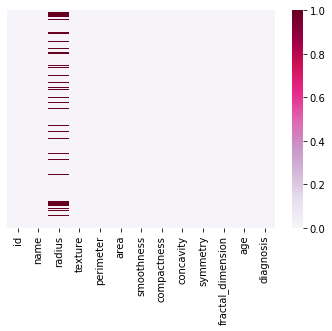

In [4]:
# simple heat map showing where we are missing data

heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)

plt.show()

*Looks like we aren't missing too much data in radius - might need to insert dummy data*

### Visualization #2: Count Plot

>*seaborn set_style* documentation: https://seaborn.pydata.org/generated/seaborn.set_style.html

>*seaborn countplot* documentation: https://seaborn.pydata.org/generated/seaborn.countplot.html

>*seaborn color_palette* documentation: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

**Parameters Explained**
 - style
     - affects color of the axes, whether a grid is enabled by default, and other aesthetic elements
 - x,y
     -  name of variable in the *data* parameter
 - data
     - dataframe, array, or list of arrays for plotting
 - palette
     - palette name, list, or dict
     - colors to use

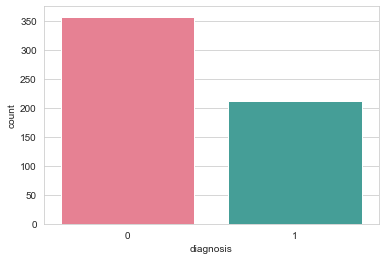

In [5]:
# a countplot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable

sns.set_style("whitegrid")
sns.countplot(data = train, x = 'diagnosis', palette = 'husl')

### Visualization #3: Histogram

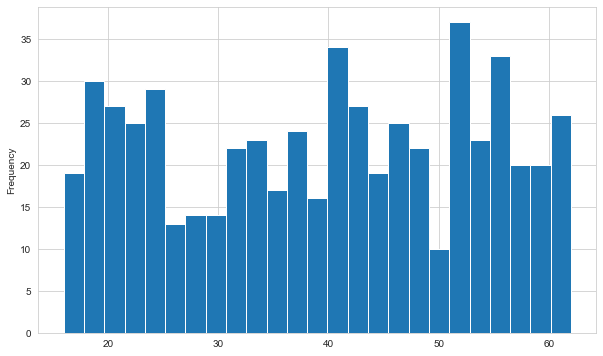

In [6]:
# let's check out the spread of ages using a histogram

train['age'].plot.hist(bins = 25, figsize = (10,6))

## Data Cleaning

The missing radius data needs to be filled in (not just dropped) by filling in the mean radius. Let's check the average radius by diagnosis.

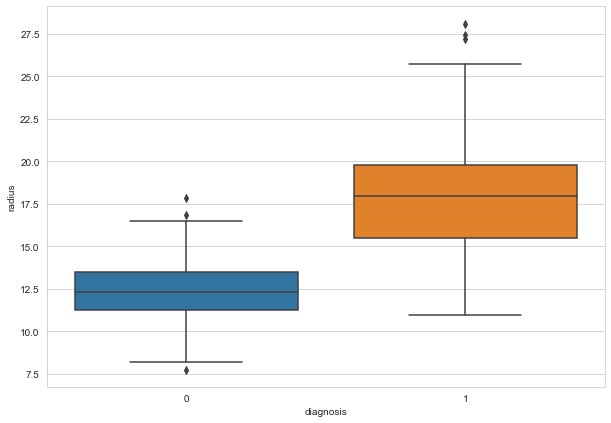

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "diagnosis", y = "radius", data = train)

Women who were diagnosed with breast cancer (diagnosis = 1) tend to have a higher tumor radius size (the distance from the center to the circumference of the tumor).

In [8]:
# calculate the average radius size by diagnosis (0 or 1)

train.groupby('diagnosis')["radius"].mean()

diagnosis
0    12.340825
1    17.896629
Name: radius, dtype: float64

In [9]:
# create a function that imputes average radius into missing values

def impute_radius(cols):
    radius = cols[0]
    diagnosis = cols[1]
    
    # if value in radius column is null
    if pd.isnull(radius):
        
        # if woman is diagnosed with breast cancer
        if diagnosis == 1:
            return 17
        # if woman was not diagnosed with breast cancer
        else:
            return 12
    # when value in radius column is not null
    else:
        # return that same value
        return radius

In [10]:
train['radius'] = train[['radius', 'diagnosis']].apply(impute_radius, axis = 1)

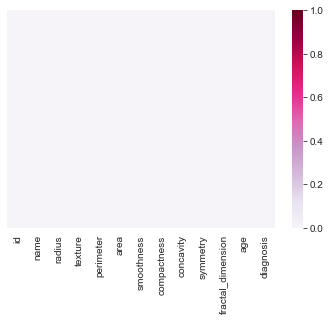

In [11]:
# check the heat map again after applying the above function

heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)

plt.show()

All rows that were missing data have now been imputed with the average radius size which was determined by whether or not the woman was diagnosed with breast cancer. No need to drop columns or impute more missing values.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                   569 non-null object
name                 569 non-null object
radius               569 non-null float64
texture              569 non-null float64
perimeter            569 non-null float64
area                 569 non-null float64
smoothness           569 non-null float64
compactness          569 non-null float64
concavity            569 non-null float64
symmetry             569 non-null float64
fractal_dimension    569 non-null float64
age                  569 non-null int64
diagnosis            569 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [13]:
# dropping categorical variables

train.drop(['id', 'name'], axis = 1, inplace = True)

In [14]:
train.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


## Building the Model

#### Step 1: Split training data into X and y

In [15]:
X = train.drop('diagnosis', axis = 1)
y = train['diagnosis']

In [16]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

#### Step 2: Train test split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#### Step 3: Training and Predicting

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logreg = LogisticRegression()

In [21]:
logreg.fit(X_train, y_train)

C:\Users\Morgan Kaiser\Anaconda3\Anaconda\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = logreg.predict(X_test)

## Evaluations

Classification report checks precision, recall, and f1 score of the model. The support is the number of samples of the true response that lie in that class.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.89      0.85      0.87        66

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[98,  7],
       [10, 56]], dtype=int64)

**Confusion matrix output explained**

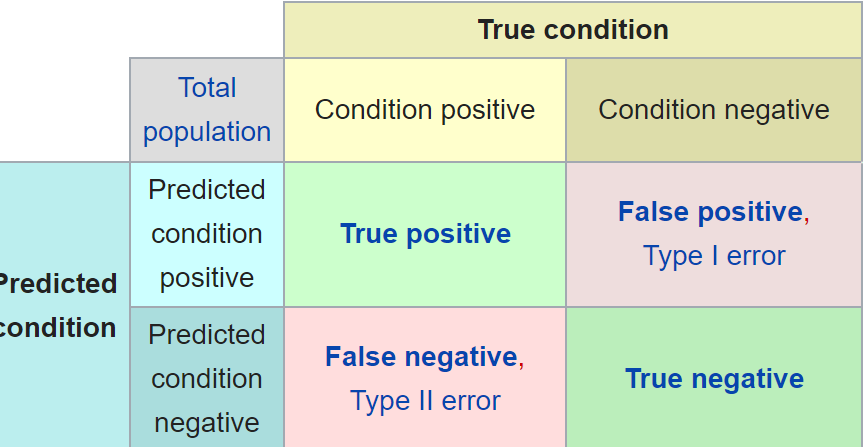

 - Total: 171 women
 - **Out of the 105 women predicted to not have breast cancer, 7 were misclassified.** *93% accuracy*
 - **Out of the 66 women predicted to have breast cancer, 10 were misclassified.** *85% accuracy*